In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from dateutil.parser import parse as dateparse
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = False
import seaborn as sns
%matplotlib inline

In [3]:
url_page_template = 'http://www.audioreview.com/product/speakers/subwoofers/b-and-w/asw-1000.html?p=%d'

In [4]:
def get_soup(url, pg):
    u = url % pg
    r = requests.get(u)
    r.raise_for_status()
    return BeautifulSoup(r.text, 'lxml')

In [5]:
def extract(s0):
    s0 = get_soup(url_page_template, 1)
    s1 = s0.find_all('table', id='user-review-desktop')
    lst = list()
    for tmp in s1:
        dct = dict()
        tmp2 = tmp.find_all('div', class_='user-review-header')
        dct['user_classification'] = tmp2[0].find('span').text
        dct['review'] = tmp2[1].find('p').text
        overall, value = [int(el.text) for el in tmp.find_all('td', class_='rate')]
        dct['overall'] = overall
        dct['value'] = value
        lst.append(dct)
    return lst

In [5]:
lst = list()
for pg in range(1, 6):
    print(pg)
    s0 = get_soup(url_page_template, pg)
    lst += extract(s0)
    

1
2
3
4
5


In [6]:
df = pd.DataFrame(lst)
df.head() 

,overall,review,user_classification,value
0,5,"hi, wicked sub/amp.. i can use more speakers w...","Casual Listener [Nov 29, 2012]",4
1,2,I just purchase this subwoofer because I wante...,"AudioPhile [Jan 27, 2011]",2
2,3,Thought I'd throw in a recent comment or two i...,"Audio Enthusiast [Dec 26, 2010]",3
3,5,Very Clean Powerful Bass\rThe Build quality is...,"AudioPhile [Jun 28, 2006]",5
4,4,"Clean, detailed, and articulate. They have spe...","Audio Enthusiast [Jun 18, 2003]",4


In [7]:
extr = df.user_classification.str.extract(r'(?P<user_classification>^[^[]+)\[(?P<date>[^[]+)\]', expand=True)
extr['date'] = extr.date.map(dateparse)
extr.head() 

,user_classification,date
0,Casual Listener,2012-11-29
1,AudioPhile,2011-01-27
2,Audio Enthusiast,2010-12-26
3,AudioPhile,2006-06-28
4,Audio Enthusiast,2003-06-18


In [8]:
df[['user_classification', 'date']] = extr
df.head() 

,overall,review,user_classification,value,date
0,5,"hi, wicked sub/amp.. i can use more speakers w...",Casual Listener,4,2012-11-29
1,2,I just purchase this subwoofer because I wante...,AudioPhile,2,2011-01-27
2,3,Thought I'd throw in a recent comment or two i...,Audio Enthusiast,3,2010-12-26
3,5,Very Clean Powerful Bass\rThe Build quality is...,AudioPhile,5,2006-06-28
4,4,"Clean, detailed, and articulate. They have spe...",Audio Enthusiast,4,2003-06-18


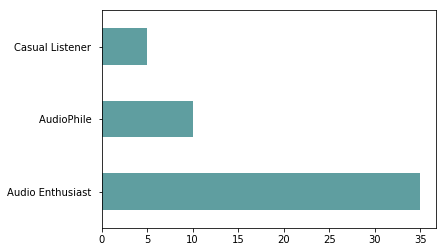

In [50]:
tmp = df.user_classification.value_counts().plot.barh(color='cadetblue')

In [26]:
ucr = df.groupby('user_classification').agg(['mean', 'std'])

In [32]:
ucr

overall               value          
                         mean       std      mean       std
user_classification                                        
Audio Enthusiast     4.428571  0.739066  4.428571  0.739066
AudioPhile           3.500000  1.581139  3.500000  1.581139
Casual Listener      5.000000  0.000000  4.000000  0.000000

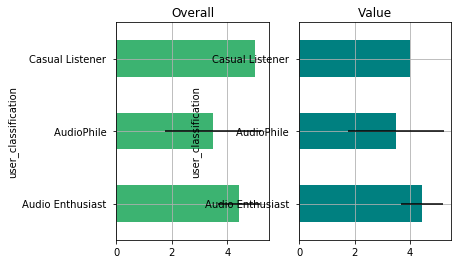

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ucr.overall['mean'].plot.barh(color='mediumseagreen', xerr=ucr.overall['std'], ax=ax1)
ucr.value['mean'].plot.barh(color='teal', xerr=ucr.value['std'], ax=ax2)
ax1.set_title('Overall')
ax2.set_title('Value')
ax1.grid()
ax2.grid() 

In [7]:
lst = list()
for pg in range(1, 3):
    print(pg)
    s0 = get_soup('http://www.audioreview.com/product/speakers/subwoofers/b-and-w/asw-600.html?p=%d', pg)
    lst += extract(s0)
df = pd.DataFrame(lst)
extr = df.user_classification.str.extract(r'(?P<user_classification>^[^[]+)\[(?P<date>[^[]+)\]', expand=True)
extr['date'] = extr.date.map(dateparse)
df[['user_classification', 'date']] = extr
df.head() 

1
2


,overall,review,user_classification,value,date
0,5,"hi, wicked sub/amp.. i can use more speakers w...",Casual Listener,4,2012-11-29
1,2,I just purchase this subwoofer because I wante...,AudioPhile,2,2011-01-27
2,3,Thought I'd throw in a recent comment or two i...,Audio Enthusiast,3,2010-12-26
3,5,Very Clean Powerful Bass\rThe Build quality is...,AudioPhile,5,2006-06-28
4,4,"Clean, detailed, and articulate. They have spe...",Audio Enthusiast,4,2003-06-18


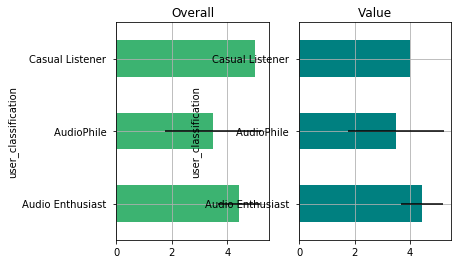

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ucr = df.groupby('user_classification').agg(['mean', 'std']) 
ucr.overall['mean'].plot.barh(color='mediumseagreen', xerr=ucr.overall['std'], ax=ax1)
ucr.value['mean'].plot.barh(color='teal', xerr=ucr.value['std'], ax=ax2)
ax1.set_title('Overall')
ax2.set_title('Value') 
ax1.grid()
ax2.grid() 